# SIT719 Security and Privacy Issues in Analytics Task 5.1 End-to-end project delivery on cyber-security data analytics

**Jorge Leonardo Lemus**

`Cod 220518936` 

In [2]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 

In [4]:
DataSet

'training_attack_types (2).txt'

In [5]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [6]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [7]:
attack_mapping

{'apache2': 'dos',
 'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'httptunnel': 'u2r',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'mailbomb': 'dos',
 'mscan': 'probe',
 'multihop': 'r2l',
 'named': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'normal': 'benign',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'processtable': 'dos',
 'ps': 'u2r',
 'rootkit': 'u2r',
 'saint': 'probe',
 'satan': 'probe',
 'sendmail': 'r2l',
 'smurf': 'dos',
 'snmpgetattack': 'dos',
 'snmpguess': 'r2l',
 'spy': 'r2l',
 'sqlattack': 'u2r',
 'teardrop': 'dos',
 'udpstorm': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'worm': 'probe',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'xterm': 'u2r'}

In [8]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)

In [9]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

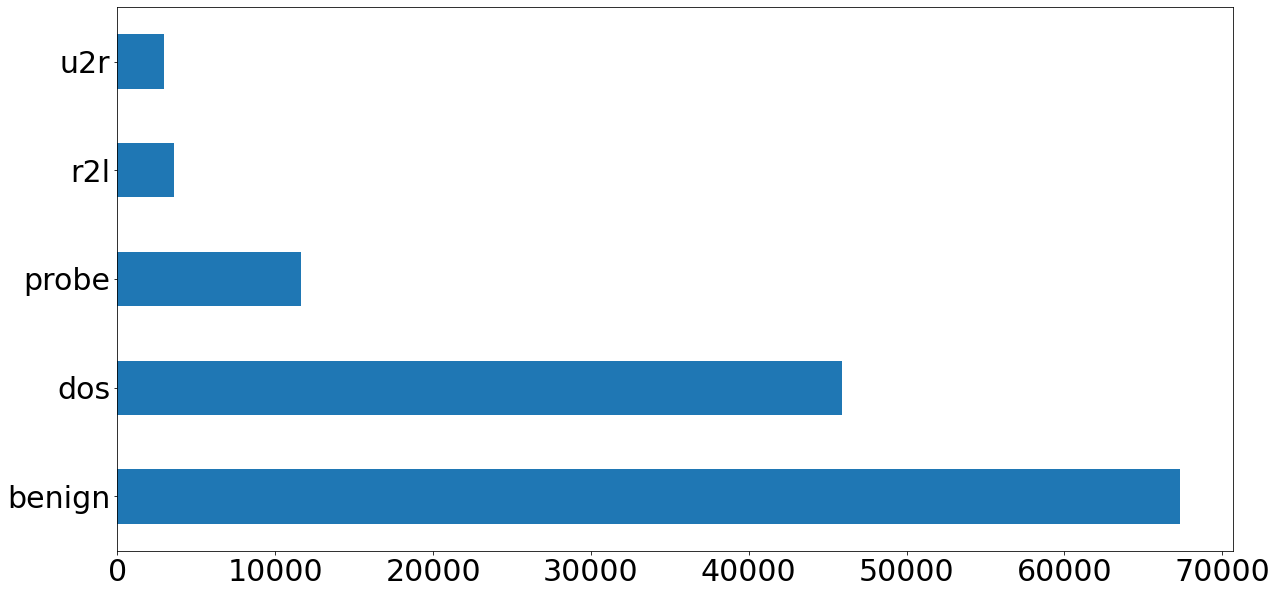

In [10]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

SECTION 3: Multi class classification

In [11]:
Class = ['Sensitivity, hit rate, recall, or true positive rate', 
         'Specificity or true negative rate',
         'Precision or positive predictive value',
         'Negative predictive value',
         'Fall out or false positive rate',
         'False negative rate',
         'False discovery rate',
         'Overall accuracy for each class',
         'F-Score']
Labels = ['benign','dos','probe','r2l','u2r']

#Algorithm 1 *Decision Tree Classifier*

In [12]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, classification_report


classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y, labels = Labels)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9360   59  289    1    2]
 [1544 5999   93    0    0]
 [ 717  190 1516    0    0]
 [2421    0   11  131   11]
 [ 174    0    2    7   17]]
0.24489886444286724


In [13]:
def multimatcal (results,test_Y, pred_y):
  FP = results.sum(axis=0) - np.diag(results) 
  FN = results.sum(axis=1) - np.diag(results)
  TP = np.diag(results)
  TN = results.sum() - (FP + FN + TP)
  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  #  Overall accuracy for each class
  ACC = (TP+TN)/(TP+FP+FN+TN)
  # F-Score 
  F1 = 2 * (PPV * TPR) / (PPV + TPR)
  
  pd.set_option('display.float_format', '{:.2f}'.format)
  Total = [TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC,F1]
  Attack_Class = pd.DataFrame(Total ,columns = Labels)
  Attack_Class.insert(0, "Name indicator", Class, True)
  Attack_Class
  
  return Attack_Class

In [14]:
Decision_tree = multimatcal(results, test_Y, pred_y)
Decision_tree

,Name indicator,benign,dos,probe,r2l,u2r
0,"Sensitivity, hit rate, recall, or true positiv...",0.96,0.79,0.63,0.05,0.09
1,Specificity or true negative rate,0.62,0.98,0.98,1.00,1.00
2,Precision or positive predictive value,0.66,0.96,0.79,0.94,0.57
3,Negative predictive value,0.96,0.90,0.96,0.89,0.99
4,Fall out or false positive rate,0.38,0.02,0.02,0.00,0.00
5,False negative rate,0.04,0.21,0.37,0.95,0.92
6,False discovery rate,0.34,0.04,0.21,0.06,0.43
7,Overall accuracy for each class,0.77,0.92,0.94,0.89,0.99
8,F-Score,0.78,0.86,0.70,0.10,0.15


#Algorithm 2 *Multi-layer Perceptron classifier.*

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(6, 3), random_state=1)
clf.fit(train_x, train_Y)

pred_y  = clf.predict(test_x)

results = confusion_matrix(test_Y, pred_y, labels = Labels)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9031  495  183    2    0]
 [1664 5903   69    0    0]
 [ 406  180 1821   16    0]
 [2050    0  177  347    0]
 [ 197    0    0    3    0]]
0.24139460610361962


In [16]:
M_lay_Perceptron = multimatcal(results, test_Y, pred_y)
M_lay_Perceptron

,Name indicator,benign,dos,probe,r2l,u2r
0,"Sensitivity, hit rate, recall, or true positiv...",0.93,0.77,0.75,0.13,0.00
1,Specificity or true negative rate,0.66,0.95,0.98,1.00,1.00
2,Precision or positive predictive value,0.68,0.90,0.81,0.94,NaN
3,Negative predictive value,0.93,0.89,0.97,0.90,0.99
4,Fall out or false positive rate,0.34,0.05,0.02,0.00,0.00
5,False negative rate,0.07,0.23,0.25,0.87,1.00
6,False discovery rate,0.32,0.10,0.19,0.06,NaN
7,Overall accuracy for each class,0.78,0.89,0.95,0.90,0.99
8,F-Score,0.78,0.83,0.78,0.24,NaN


#Algorithm 3 *Support vector machines (SVMs)*

In [17]:
from sklearn.svm import SVC 
clf = SVC(kernel='linear') 
clf.fit(train_x, train_Y)

pred_y = clf.predict(test_x)

results = confusion_matrix(test_Y, pred_y, labels = Labels)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9040  225  437    4    5]
 [1445 6179   12    0    0]
 [ 720  115 1588    0    0]
 [2291    1    2  275    5]
 [ 180    1    0    3   16]]
0.2415720369056068


In [18]:
SVM = multimatcal(results, test_Y, pred_y)
SVM

,Name indicator,benign,dos,probe,r2l,u2r
0,"Sensitivity, hit rate, recall, or true positiv...",0.93,0.81,0.66,0.11,0.08
1,Specificity or true negative rate,0.64,0.98,0.98,1.00,1.00
2,Precision or positive predictive value,0.66,0.95,0.78,0.98,0.62
3,Negative predictive value,0.92,0.91,0.96,0.90,0.99
4,Fall out or false positive rate,0.36,0.02,0.02,0.00,0.00
5,False negative rate,0.07,0.19,0.34,0.89,0.92
6,False discovery rate,0.34,0.05,0.22,0.02,0.38
7,Overall accuracy for each class,0.76,0.92,0.94,0.90,0.99
8,F-Score,0.77,0.87,0.71,0.19,0.14


#Algorithm 4 *Multinomial Naive Bayes*

In [19]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB() 
clf.fit(train_x, train_Y)

pred_y = clf.predict(test_x)

results = confusion_matrix(test_Y, pred_y, labels = Labels)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
0.5053672817601136


In [20]:
Naiv_Bay = multimatcal(results, test_Y, pred_y)
Naiv_Bay

,Name indicator,benign,dos,probe,r2l,u2r
0,"Sensitivity, hit rate, recall, or true positiv...",0.70,0.41,0.10,0.36,0.32
1,Specificity or true negative rate,0.53,0.97,1.00,0.80,0.96
2,Precision or positive predictive value,0.53,0.89,0.92,0.19,0.06
3,Negative predictive value,0.70,0.76,0.90,0.91,0.99
4,Fall out or false positive rate,0.47,0.03,0.00,0.20,0.04
5,False negative rate,0.30,0.59,0.90,0.64,0.69
6,False discovery rate,0.47,0.11,0.08,0.81,0.94
7,Overall accuracy for each class,0.60,0.78,0.90,0.75,0.95
8,F-Score,0.60,0.56,0.18,0.25,0.10


#Algorithm 5 *k-nearest neighbors vote.*

In [21]:
from sklearn.neighbors import KNeighborsClassifier

clf =KNeighborsClassifier(n_neighbors=5)
clf.fit(train_x, train_Y)

pred_y = clf.predict(test_x)

results = confusion_matrix(test_Y, pred_y, labels = Labels)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9444   54  207    5    1]
 [1630 5925   81    0    0]
 [ 614  180 1629    0    0]
 [2362    2   40  170    0]
 [ 170    0   17    4    9]]
0.23806777856635908


In [22]:
kneir = multimatcal(results, test_Y, pred_y)
kneir

,Name indicator,benign,dos,probe,r2l,u2r
0,"Sensitivity, hit rate, recall, or true positiv...",0.97,0.78,0.67,0.07,0.04
1,Specificity or true negative rate,0.63,0.98,0.98,1.00,1.00
2,Precision or positive predictive value,0.66,0.96,0.83,0.95,0.90
3,Negative predictive value,0.97,0.90,0.96,0.89,0.99
4,Fall out or false positive rate,0.37,0.02,0.02,0.00,0.00
5,False negative rate,0.03,0.22,0.33,0.93,0.95
6,False discovery rate,0.34,0.04,0.17,0.05,0.10
7,Overall accuracy for each class,0.78,0.91,0.95,0.89,0.99
8,F-Score,0.79,0.86,0.74,0.12,0.09


#Summarize the Results

In [23]:
Decision_tree.insert(0,'Algorithms', 'Decision Tree')
M_lay_Perceptron.insert(0,'Algorithms', 'Multi-layer Perceptron')
SVM.insert(0,'Algorithms', 'Support Vector Machine')
Naiv_Bay.insert(0,'Algorithms', 'Naive Bayes')
kneir.insert(0,'Algorithms', 'K-neighbour')

In [24]:
Summarize = pd.concat([Decision_tree, M_lay_Perceptron, SVM, Naiv_Bay, kneir], axis = 0)
Summarize

,Algorithms,Name indicator,benign,dos,probe,r2l,u2r
0,Decision Tree,"Sensitivity, hit rate, recall, or true positiv...",0.96,0.79,0.63,0.05,0.09
1,Decision Tree,Specificity or true negative rate,0.62,0.98,0.98,1.00,1.00
2,Decision Tree,Precision or positive predictive value,0.66,0.96,0.79,0.94,0.57
3,Decision Tree,Negative predictive value,0.96,0.90,0.96,0.89,0.99
4,Decision Tree,Fall out or false positive rate,0.38,0.02,0.02,0.00,0.00
5,Decision Tree,False negative rate,0.04,0.21,0.37,0.95,0.92
6,Decision Tree,False discovery rate,0.34,0.04,0.21,0.06,0.43
7,Decision Tree,Overall accuracy for each class,0.77,0.92,0.94,0.89,0.99
8,Decision Tree,F-Score,0.78,0.86,0.70,0.10,0.15
0,Multi-layer Perceptron,"Sensitivity, hit rate, recall, or true positiv...",0.93,0.77,0.75,0.13,0.00


#DataSet 2 Preproccesing

In [25]:
from google.colab import drive
drive.mount('/content/drive')
data = '/content/drive/MyDrive/2020/Deakin/SIT719/week 6/Processed_Combined_IoT_dataset.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
from zipfile import ZipFile

  
# opening the zip file in READ mode
with ZipFile(data, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
Processed_Combined_IoT_dataset.csv             2021-04-07 11:25:38     63321624
Extracting all the files now...
Done!


In [27]:
df1 = pd.read_csv('Processed_Combined_IoT_dataset.csv')

In [28]:
df1.head(4)

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.50,0.50,0.49,0.50,0.34,0,0.93,0.46,0.01,0,0.01,0,0.53,0.67,0.20,0.52,1,0
1,0.50,0.50,0.49,0.50,0.34,0,0.59,0.46,0.01,0,0.01,0,0.53,0.67,0.20,0.52,1,0
2,0.50,0.50,0.49,0.50,0.34,0,0.08,0.46,0.01,0,0.01,0,0.53,0.67,0.80,0.52,1,0
3,0.50,0.50,0.49,0.50,0.34,0,0.29,0.46,0.01,0,0.01,0,0.53,0.67,0.80,0.52,1,0


In [29]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df1.iloc[:,range(0,17)], df1['label'], test_size = 0.3, random_state=2)
print("Number of training samples:\t" + str(len(train_X)))
print("Number of testing samples:\t" + str(len(test_X)))

Number of training samples:	280783
Number of testing samples:	120336


#Algorithm 2.1 Decision Tree

In [30]:
Labels = ['zero','uno']

In [31]:
from sklearn.model_selection import cross_val_score
classifier = DecisionTreeClassifier(random_state=1)

classifier.fit(train_X, train_y)

scores_DT = cross_val_score(classifier, train_X, train_y, cv=5)

pred_y = classifier.predict(test_X)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

Decision_Tree2 = results
print(results)
print(error)
print(scores_DT)

[[69246  4321]
 [11941 34828]]
0.13513827948411117
[0.85650943 0.85809427 0.85773813 0.85843009 0.8594095 ]


In [32]:
Decision_tree2 = multimatcal(results, test_y, pred_y)
Decision_tree2

,Name indicator,zero,uno
0,"Sensitivity, hit rate, recall, or true positiv...",0.94,0.74
1,Specificity or true negative rate,0.74,0.94
2,Precision or positive predictive value,0.85,0.89
3,Negative predictive value,0.89,0.85
4,Fall out or false positive rate,0.26,0.06
5,False negative rate,0.06,0.26
6,False discovery rate,0.15,0.11
7,Overall accuracy for each class,0.86,0.86
8,F-Score,0.89,0.81


#Algorithm 2.2 Multi-layer Perceptron classifier

In [33]:
classifier = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(6, 3), random_state=1)
classifier.fit(train_X, train_y)

scores_MPC = cross_val_score(classifier, train_X, train_y, cv=5)

pred_y = classifier.predict(test_X)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print(results)
print(error)
print(scores_MPC)

[[71579  1988]
 [27077 19692]]
0.24153204361122194
[0.76620902 0.75919298 0.76829247 0.76868011 0.75852981]


In [34]:
M_lay_Perceptron2 = multimatcal(results, test_y, pred_y)
M_lay_Perceptron2

,Name indicator,zero,uno
0,"Sensitivity, hit rate, recall, or true positiv...",0.97,0.42
1,Specificity or true negative rate,0.42,0.97
2,Precision or positive predictive value,0.73,0.91
3,Negative predictive value,0.91,0.73
4,Fall out or false positive rate,0.58,0.03
5,False negative rate,0.03,0.58
6,False discovery rate,0.27,0.09
7,Overall accuracy for each class,0.76,0.76
8,F-Score,0.83,0.58


#Algorithm 2.3 Stochastic Gradient Descent

In [42]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss="log", penalty="l2", max_iter=3)
classifier.fit(train_X, train_y)

scores_SGDC = cross_val_score(classifier, train_X, train_y, cv=5)

pred_y = classifier.predict(test_X)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print(results)
print(error)
print(scores_SGDC)

[[71803  1764]
 [35620 11149]]
0.31066347560164875
[0.681785   0.7005538  0.68296027 0.70435928 0.69688012]


In [43]:
SGDC= multimatcal(results, test_y, pred_y)
SGDC

,Name indicator,zero,uno
0,"Sensitivity, hit rate, recall, or true positiv...",0.98,0.24
1,Specificity or true negative rate,0.24,0.98
2,Precision or positive predictive value,0.67,0.86
3,Negative predictive value,0.86,0.67
4,Fall out or false positive rate,0.76,0.02
5,False negative rate,0.02,0.76
6,False discovery rate,0.33,0.14
7,Overall accuracy for each class,0.69,0.69
8,F-Score,0.79,0.37



#Algorithm 2.4 NaiveBayes

In [37]:
classifier = GaussianNB() 
classifier.fit(train_X, train_y)

scores_NB = cross_val_score(classifier, train_X, train_y, cv=5)

pred_y = classifier.predict(test_X)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print(results)
print(error)
print(scores_NB)

[[68910  4657]
 [31244 15525]]
0.29833964898284804
[0.69996617 0.69939634 0.69989494 0.70060189 0.70092243]


In [38]:
Naiv_Bay2 = multimatcal(results, test_y, pred_y)
Naiv_Bay2

,Name indicator,zero,uno
0,"Sensitivity, hit rate, recall, or true positiv...",0.94,0.33
1,Specificity or true negative rate,0.33,0.94
2,Precision or positive predictive value,0.69,0.77
3,Negative predictive value,0.77,0.69
4,Fall out or false positive rate,0.67,0.06
5,False negative rate,0.06,0.67
6,False discovery rate,0.31,0.23
7,Overall accuracy for each class,0.70,0.70
8,F-Score,0.79,0.46


#Algorithm 2.5 k-nearest neighbour

In [39]:
classifier =KNeighborsClassifier(n_neighbors=2)
classifier.fit(train_X, train_y)

scores_kn = cross_val_score(classifier, train_X, train_y, cv=5)

pred_y = classifier.predict(test_X)

results = confusion_matrix(test_y, pred_y)
error = zero_one_loss(test_y, pred_y)

print(results)
print(error)
print(scores_kn)

[[71985  1582]
 [14660 32109]]
0.1349720781810929
[0.85442598 0.85561907 0.85478213 0.85540281 0.85579457]


In [40]:
kneir2 = multimatcal(results, test_y, pred_y)
kneir2

,Name indicator,zero,uno
0,"Sensitivity, hit rate, recall, or true positiv...",0.98,0.69
1,Specificity or true negative rate,0.69,0.98
2,Precision or positive predictive value,0.83,0.95
3,Negative predictive value,0.95,0.83
4,Fall out or false positive rate,0.31,0.02
5,False negative rate,0.02,0.31
6,False discovery rate,0.17,0.05
7,Overall accuracy for each class,0.87,0.87
8,F-Score,0.90,0.80


#Summarize the results

In [ ]:
Decision_tree2.insert(0,'Algorithms', 'Decision Tree')
M_lay_Perceptron2.insert(0,'Algorithms', 'Multi-layer Perceptron')
SGDC.insert(0,'Algorithms', 'Stochastic Gradient Descent')
Naiv_Bay2.insert(0,'Algorithms', 'Naive Bayes')
kneir2.insert(0,'Algorithms', 'K-neighbour')

In [47]:
Summarize2 = pd.concat([Decision_tree2, M_lay_Perceptron2, SGDC, Naiv_Bay2, kneir2], axis = 0)
Summarize2

,Algorithms,Name indicator,zero,uno
0,Decision Tree,"Sensitivity, hit rate, recall, or true positiv...",0.94,0.74
1,Decision Tree,Specificity or true negative rate,0.74,0.94
2,Decision Tree,Precision or positive predictive value,0.85,0.89
3,Decision Tree,Negative predictive value,0.89,0.85
4,Decision Tree,Fall out or false positive rate,0.26,0.06
5,Decision Tree,False negative rate,0.06,0.26
6,Decision Tree,False discovery rate,0.15,0.11
7,Decision Tree,Overall accuracy for each class,0.86,0.86
8,Decision Tree,F-Score,0.89,0.81
0,Multi-layer Perceptron,"Sensitivity, hit rate, recall, or true positiv...",0.97,0.42


#Data Visualization 1st Point

Decision Tree: 0.997849 (0.000079)
Multi-layer Perceptron: 0.992617 (0.000282)
Naive Bayes: 0.742691 (0.062327)
K-nearest  neighbour: 0.996563 (0.000059)
SGDC: 0.974661 (0.000255)


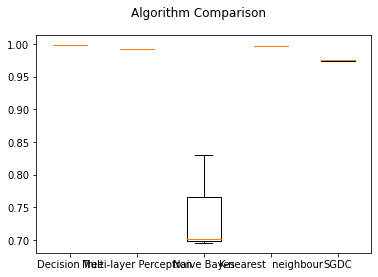

In [51]:
from sklearn import model_selection
models = []
models.append(('Decision Tree', DecisionTreeClassifier(random_state=1)))
models.append(('Multi-layer Perceptron', MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(6, 3), random_state=1)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('K-nearest  neighbour', KNeighborsClassifier(n_neighbors=2)))
models.append(('SGDC', SGDClassifier(loss="log", penalty="l2", max_iter=3)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=3, random_state=1, shuffle= True)
	cv_results = model_selection.cross_val_score(model, train_x, train_Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Data Visualization 2nd Point

Decision Tree: 0.853802 (0.000820)
Multi-layer Perceptron: 0.764494 (0.003498)
Naive Bayes: 0.700124 (0.001963)
K-nearest  neighbour: 0.849403 (0.000355)
SGDC: 0.694551 (0.009893)


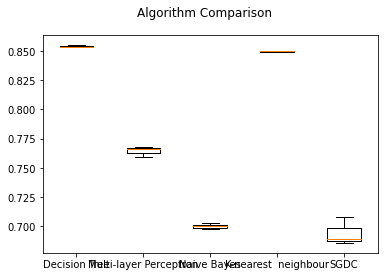

In [50]:
from sklearn import model_selection
models = []
models.append(('Decision Tree', DecisionTreeClassifier(random_state=1)))
models.append(('Multi-layer Perceptron', MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(6, 3), random_state=1)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('K-nearest  neighbour', KNeighborsClassifier(n_neighbors=2)))
models.append(('SGDC', SGDClassifier(loss="log", penalty="l2", max_iter=3)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=3, random_state=1, shuffle= True)
	cv_results = model_selection.cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Bibliography

*https://d2l.deakin.edu.au/d2l/le/content/1122448/Home*

*https://scikit-learn.org/stable/index.html*

*https://pandas.pydata.org/pandas-docs/stable/index.html*

*https://stackoverflow.com/*

*https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/*

*https://towardsdatascience.com/*
